## EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

## Информация о данных исходного датасета

Датасет **_data.csv** представляет собой информацию по объявлениям об аренде квартир в Москве. Набор данных содержит сведения о типе недвижимости, расположении объекта, его основных характеристиках и условиях аренды.

In [2]:
df = pd.read_csv('_data.csv')

### Сводная информация о наборе данных и типах значений

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23368 entries, 0 to 23367
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                23368 non-null  int64  
 1   ID  объявления            23368 non-null  int64  
 2   Количество комнат         22327 non-null  object 
 3   Тип                       23368 non-null  object 
 4   Метро                     22053 non-null  object 
 5   Адрес                     23368 non-null  object 
 6   Площадь, м2               23368 non-null  object 
 7   Дом                       23368 non-null  object 
 8   Парковка                  9951 non-null   object 
 9   Цена                      23368 non-null  object 
 10  Телефоны                  23368 non-null  object 
 11  Описание                  23368 non-null  object 
 12  Ремонт                    20613 non-null  object 
 13  Площадь комнат, м2        14458 non-null  object 
 14  Балкон

# Размер набора данных

In [4]:
print('Количество строк в датасете:', df.shape[0])

Количество строк в датасете: 23368


In [5]:
print('Количество столбцов:', df.shape[1])

Количество столбцов: 25


### Столбцы датасета содержат следующую информацию:

In [6]:
column_names = list(df.columns.values)
print(*column_names, sep='\n ')

Unnamed: 0
 ID  объявления
 Количество комнат
 Тип
 Метро
 Адрес
 Площадь, м2
 Дом
 Парковка
 Цена
 Телефоны
 Описание
 Ремонт
 Площадь комнат, м2
 Балкон
 Окна
 Санузел
 Можно с детьми/животными
 Дополнительно
 Название ЖК
 Серия дома
 Высота потолков, м
 Лифт
 Мусоропровод
 Ссылка на объявление


## Количество пропущенных значений

In [7]:
pd.DataFrame(df.isnull().sum().sort_values(ascending=False), columns=['количество пропущенных значений'])

,количество пропущенных значений
Серия дома,21205
Название ЖК,17520
Парковка,13417
"Высота потолков, м",12162
Мусоропровод,10522
"Площадь комнат, м2",8910
Балкон,7978
Окна,6613
Можно с детьми/животными,6096
Лифт,5500


Принимая во внимание количество пропущенных значений и цели нашего исследования, было решено, что информация в следующих колонках не представляет для нас практического интереса:
- Телефоны
- Описание
- Unnamed: 0
- Серия дома
- Ссылка на объявление
- Название ЖК
- Площадь комнат, м2
- Тип

In [8]:
df_cut = df = df.drop(columns=['Тип', 'Телефоны', 'Описание', 'Unnamed: 0', 'Серия дома', 'Ссылка на объявление', 'Название ЖК', 'Площадь комнат, м2'])

## Категориальные метки

Перечислить колонки, графики зависимости цены от каждой категории, количество значений каждой категории

## Колонка "Парковка"

In [9]:
pd.DataFrame(df_cut['Парковка'].value_counts(dropna=False))

,Парковка
NaN,13417
наземная,6043
подземная,2772
открытая,1017
многоуровневая,118
на крыше,1


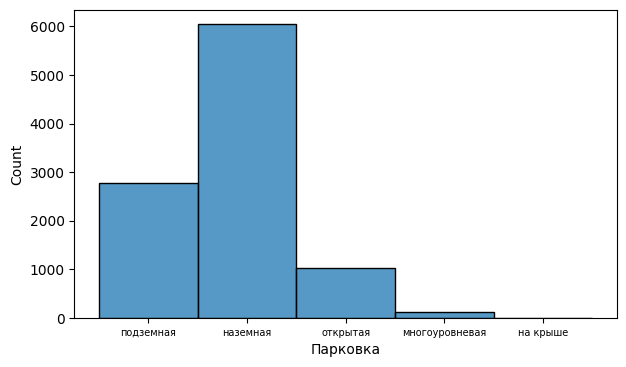

In [10]:
plt.figure(figsize=(7, 4))
sns.histplot(data=df_cut, x='Парковка')
plt.xticks(fontsize=7)
plt.show()

#### Поменяем NaN

## Колонка "Балкон"

In [11]:
pd.DataFrame(df_cut['Балкон'].value_counts(dropna=False))

,Балкон
NaN,7978
Балкон (1),7428
Лоджия (1),6007
"Балкон (1), Лоджия (1)",716
Лоджия (2),568
Балкон (2),474
Балкон (3),55
Лоджия (3),45
"Балкон (2), Лоджия (2)",25
"Балкон (1), Лоджия (2)",24


#### Делим на две колонки "Балкон" и "Лоджия", NaN заполняем 0

## Колонка "Ремонт"

In [12]:
pd.DataFrame(df_cut['Ремонт'].value_counts(dropna=False))

,Ремонт
Косметический,8499
Евроремонт,8470
Дизайнерский,3474
NaN,2755
Без ремонта,170


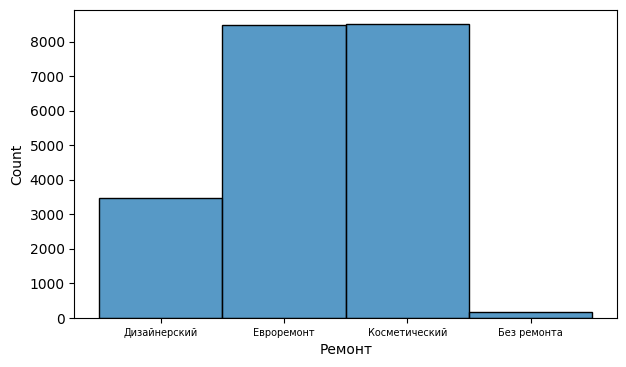

In [13]:
plt.figure(figsize=(7, 4))
sns.histplot(data=df_cut, x='Ремонт')
plt.xticks(fontsize=7)
plt.show()

#### Заменим NaN

## Колонка "Адрес"

#### Поскольку для пилотного проекта выбрана Москва, то необходимо будет отфильтровать значения только для этого города.

In [14]:
pd.DataFrame(df['Адрес'].apply(lambda x: x.split(', ')[0] if type(x) != float else x).value_counts())

,Адрес
Москва,19737
Санкт-Петербург,3028
Краснодарский край,603


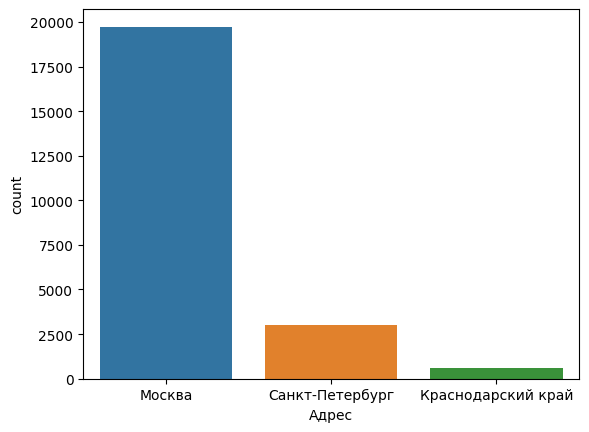

In [15]:
sns.countplot(x=df['Адрес'].apply(lambda x: x.split(', ')[0] if type(x) != float else x));

## Колонка "Количество комнат"

In [16]:
pd.DataFrame(df['Количество комнат'].value_counts())

,Количество комнат
1,7917
"2, Изолированная",4623
2,2591
3,1717
"3, Изолированная",1583
"3, Оба варианта",875
4,674
"2, Смежная",637
"2, Оба варианта",615
"4, Оба варианта",253


#### Данная колонка содержить в себе большое количество значений, которые можно поделить на две колонки с количеством комнат и вариантом размещения. Колонку с количеством комнат, заполнить пропущенные значения и перевести в тип int.¶

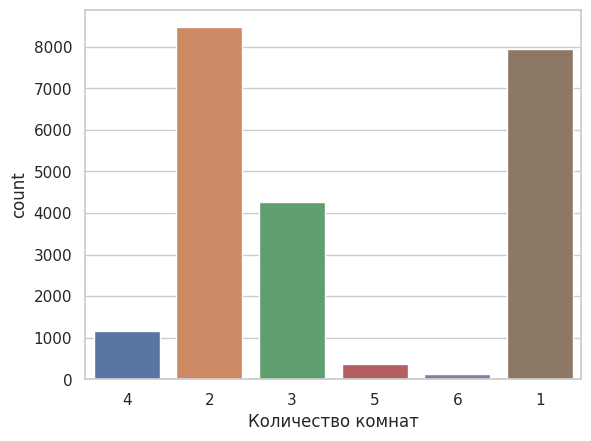

In [17]:
df['Количество комнат'] = df['Количество комнат'].apply(lambda x: x.split(', ')[0] if type(x) != float else x)

sns.set_theme(style="whitegrid")
sns.countplot(x=df['Количество комнат']);

## Колонка "Окна"

In [18]:
pd.DataFrame(df['Окна'].value_counts(dropna=False))

,Окна
Во двор,10870
NaN,6613
На улицу и двор,3295
На улицу,2590


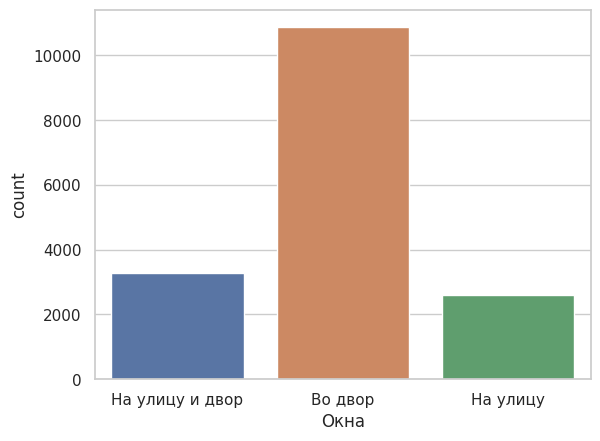

In [19]:
sns.countplot(x=df['Окна']);

#### Заменим NaN

## Колонка "Можно с детьми/с животными"

In [20]:
pd.DataFrame(df['Можно с детьми/животными'].value_counts(dropna=False))

,Можно с детьми/животными
Можно с детьми,10134
"Можно с детьми, Можно с животными",6899
NaN,6096
Можно с животными,239


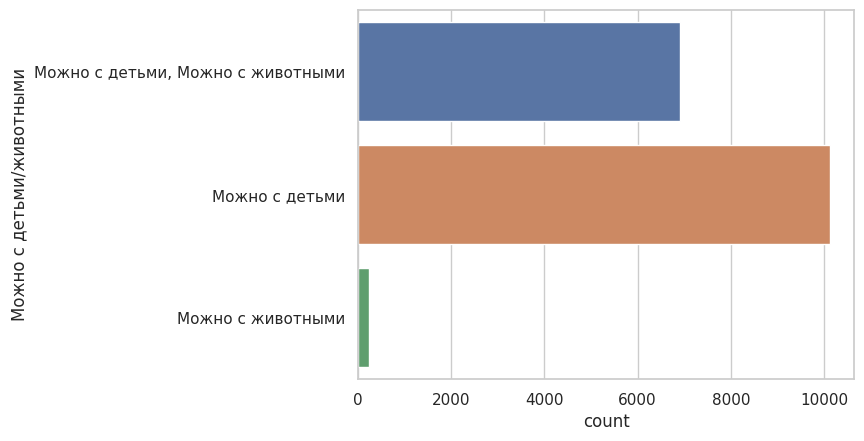

In [21]:
sns.countplot(y=df['Можно с детьми/животными']);

#### Заменим NaN

## Колонка "Лифт"

In [22]:
pd.DataFrame(df['Лифт'].value_counts(dropna=False))

,Лифт
Пасс (1),5911
NaN,5500
Пасс (2),4326
"Пасс (1), Груз (1)",3962
"Пасс (2), Груз (1)",1224
"Пасс (2), Груз (2)",654
Пасс (3),636
Пасс (4),346
"Пасс (3), Груз (1)",187
"Пасс (1), Груз (2)",185


#### Нужно заменить NaN, также поделить на тип лифта, а также посчитать общее количество лифтов

## Колонка "Мусоропровод"

In [23]:
pd.DataFrame(df['Мусоропровод'].value_counts(dropna=False))

,Мусоропровод
Да,10897
NaN,10522
Нет,1949


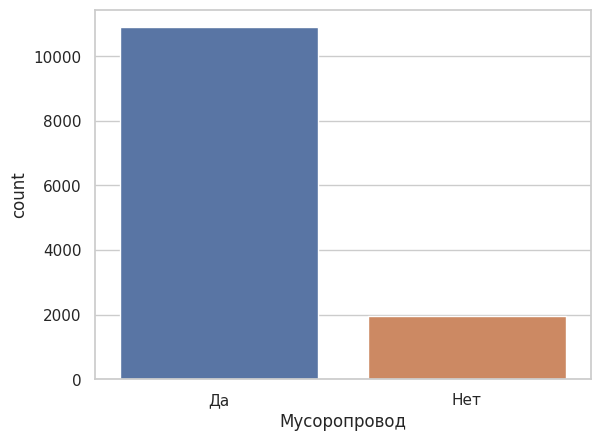

In [24]:
sns.countplot(x=df['Мусоропровод']);

#### Колонка имеет два значения (не включая NaN), которые нужно заменить на 0 или 1¶

### Цена

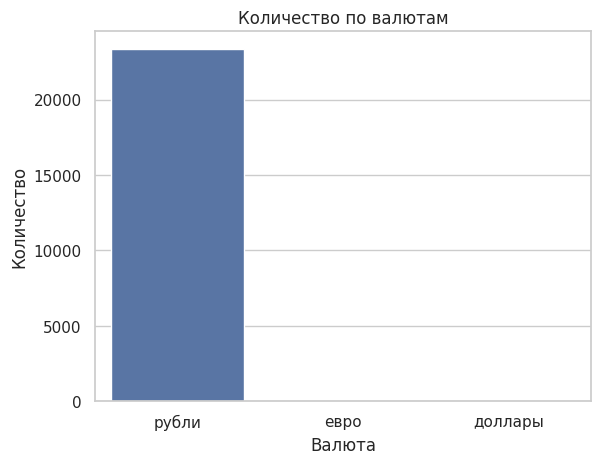

RUB: 23344
EUR: 10
DOL: 14


In [25]:
stack = []
for row in df['Цена']:
    stack.append(row)
stack_dol = []
stack_eur = []
for row in stack:
    if '€' in row:
        stack_eur.append(row)
    elif '$' in row:
        stack_dol.append(row)
len_rub = len(df) - (len(stack_eur) + len(stack_dol))

tr = pd.DataFrame([len_rub,len(stack_eur), len(stack_dol)], index = ['рубли', 'евро', 'доллары'], columns=['Количество'])
sns.barplot(x=tr .index, y='Количество', data=tr)
plt.title('Количество по валютам')
plt.xlabel('Валюта')
plt.ylabel('Количество')
plt.show()
print(f'RUB: {len_rub}')
print(f'EUR: {len(stack_eur)}')
print(f'DOL: {len(stack_dol)}')

### Из графика видно, что оснвная часть цен предвсвалена в рублях.
- Количество объявлений в рублях 23344
- Количество объявлений в евро 10
- Количество объявлений в долларах 14

### Санузел

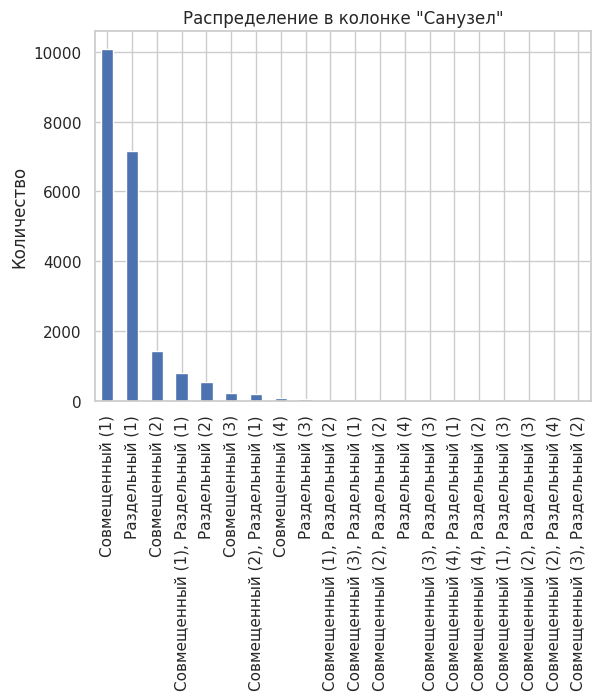

In [26]:
df['Санузел'].value_counts().plot(kind='bar')
# добавляем название диаграммы и подписи для осей
plt.title('Распределение в колонке "Санузел"')
plt.xlabel('')
plt.ylabel('Количество')
# отображаем диаграмму
plt.show()

In [27]:
pd.DataFrame(df['Санузел'].value_counts(dropna=False))

,Санузел
Совмещенный (1),10078
Раздельный (1),7158
NaN,2672
Совмещенный (2),1437
"Совмещенный (1), Раздельный (1)",812
Раздельный (2),534
Совмещенный (3),241
"Совмещенный (2), Раздельный (1)",188
Совмещенный (4),77
Раздельный (3),52


#### Нужно заменить NaN, также поделить на тип санузла, а также посчитать общее количество санузлов

### Метро

In [28]:
pd.DataFrame(df['Метро'].value_counts(dropna=False))

,Метро
NaN,1315
м. Академическая (10 мин пешком),41
м. Водный стадион (5 мин пешком),40
м. Приморская (None мин пешком),35
м. Щелковская (15 мин пешком),34
...,...
м. Печатники (38 мин пешком),1
м. Печатники (35 мин пешком),1
м. Авиамоторная (1 мин пешком),1
м. Фонвизинская (16 мин пешком),1


### Делим это на две колнки название метро и время пешком до метро